In [1]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import os
import re

### Helper Function

In [2]:
# Function to extract date info from raw data
def extract_date_info_v2(date_str):
    """
    Extracts the month, day, and year from a date string.
    
    Parameters:
    - date_str: A string representing a date in the format "Day Mon DD HH:MM:SS +0000 YYYY"
    
    Returns:
    - A tuple containing the month as a string, day and year as integers.
    """
    # Regular expression to capture the month, day, and year
    match = re.search(r'\w+\s+(\w+)\s+(\d+)\s+\d{2}:\d{2}:\d{2}\s+\+\d{4}\s+(\d{4})', date_str)
    if match:
        month, day, year = match.groups()
        return month, int(day), int(year)
    return None, None, None

In [3]:
# function to combine all raw data into dataframe 
def data_combine(country):
    # read in raw data and combine them into dataframe 
    folder_path = '/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/{country}'.format(country = country)  # Update this to your folder path
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Concatenate all the dataframes in the list
    all_dataframes = [] 
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        all_dataframes.append(df)
    china_df = pd.concat(all_dataframes, ignore_index=True)

    # Apply to raw data
    china_df['month'], china_df['day'], china_df['year'] = zip(*china_df['created_at'].apply(extract_date_info_v2))

    # drop previous date column 
    china_df1 = china_df.drop(columns=["created_at"])

    # drop duplicate tweets 
    china_df2 = china_df1.drop_duplicates()
    indices_to_drop = china_df2[china_df2['year'] == 2024].index
    china_df3 = china_df2.drop(indices_to_drop)
    china_cleaned = china_df3.sort_values(by=['year','month'],ascending=True)

    # Checking for year and month distribution after remove duplicates
    month_distribution = china_cleaned['month'].value_counts()
    year_distribution = china_cleaned['year'].value_counts()
    print('cleaned year distribution for {country}: '.format(country = country))
    print(year_distribution)
    print('cleaned month distribution for {country}: '.format(country = country))
    print(month_distribution)

    return china_cleaned

### Processing Data

In [108]:
ru_cleaned = data_combine('Russia')
nk_cleaned = data_combine('North_Korean') 

cleaned year distribution for Russia: 
2018    2985
2019    2984
2022    2884
2020    2849
2021    2805
2023    2658
Name: year, dtype: int64
cleaned month distribution for Russia: 
Feb    1536
Jan    1502
Jul    1480
May    1475
Aug    1464
Apr    1446
Jun    1439
Dec    1422
Oct    1415
Mar    1396
Sep    1374
Nov    1216
Name: month, dtype: int64
cleaned year distribution for North_Korean: 
2018    2572
2021    2530
2022    2504
2019    2493
2023    2473
2020    2451
Name: year, dtype: int64
cleaned month distribution for North_Korean: 
Feb    1316
Aug    1288
Jan    1285
Sep    1285
Oct    1271
May    1267
Apr    1261
Jun    1225
Dec    1223
Nov    1208
Mar    1204
Jul    1190
Name: month, dtype: int64


In [115]:
# Call the function to read in data 
china_cleaned = data_combine('China')
ir_cleaned = data_combine('Iran')

cleaned year distribution for China: 
2018    3279
2023    3209
2022    2926
2021    2890
2019    2883
2020    2815
Name: year, dtype: int64
cleaned month distribution for China: 
Dec    1721
Jun    1608
Mar    1551
Nov    1551
Oct    1539
Sep    1513
Feb    1483
May    1446
Apr    1435
Jul    1422
Jan    1412
Aug    1321
Name: month, dtype: int64
cleaned year distribution for Iran: 
2021    3577
2023    3516
2022    3480
2020    3086
2019    2968
2018    2781
Name: year, dtype: int64
cleaned month distribution for Iran: 
Dec    1728
Sep    1711
May    1705
Aug    1659
Feb    1646
Nov    1626
Apr    1596
Jan    1574
Mar    1559
Jun    1556
Jul    1524
Oct    1524
Name: month, dtype: int64


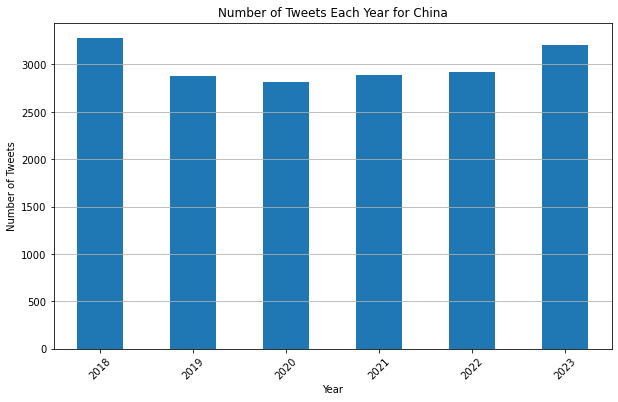

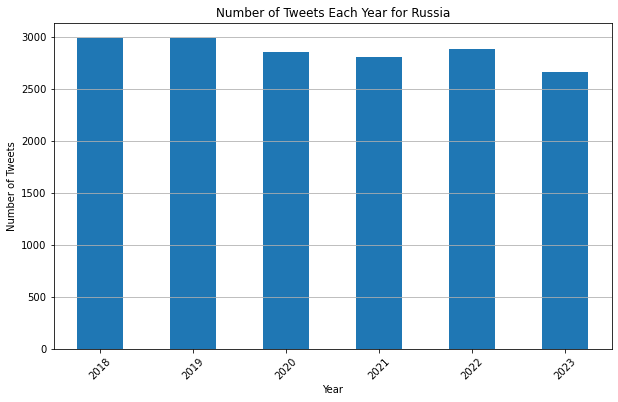

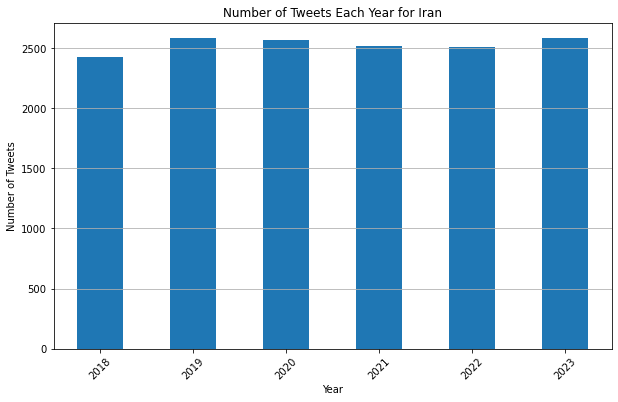

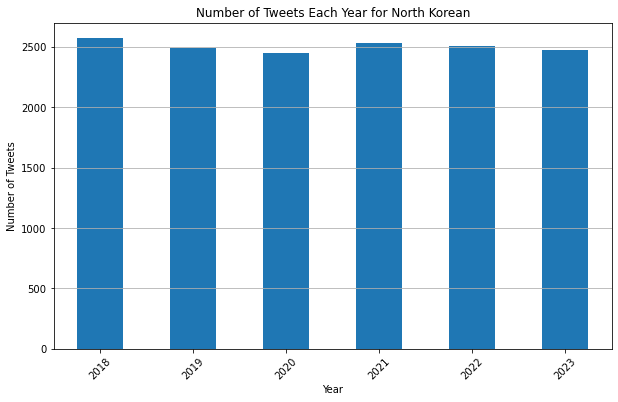

In [109]:
def visualize_tweets_per_year(dataframe, title):
    """
    Visualize the number of tweets per year.
    
    Parameters:
    - dataframe: pandas DataFrame with a 'year' column.
    - title: str, title for the plot indicating the dataset being visualized.
    """
    tweets_per_year = dataframe['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    tweets_per_year.plot(kind='bar')
    
    plt.title(f'Number of Tweets Each Year for {title}')
    plt.xlabel('Year')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Assuming you have four DataFrames: df1, df2, df3, df4
# And corresponding titles for these DataFrames
dataframes_and_titles = [
    (china_cleaned, 'China'),
    (ru_cleaned, 'Russia'),
    (ir_cleaned, 'Iran'),
    (nk_cleaned, 'North Korean')
]

# Looping through each DataFrame and its title, and visualizing the year distribution
for dataframe, title in dataframes_and_titles:
    visualize_tweets_per_year(dataframe, title)


In [113]:
# save the cleaned data into csv file
ir_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/iran_cleaned.csv")

In [116]:
china_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/china_cleaned.csv")

In [111]:
nk_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/nk_cleaned.csv")

In [105]:
ru_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/russia_cleaned.csv")